# 날씨 빅데이터 공모전


In [1]:
# 한글폰트 사용 in colab
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#!apt-get update -qq
#!apt-get install fonts-nanum* -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,192 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and dire

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)

PATH = "/content/drive/MyDrive/공모전/날씨빅데이터/"

Mounted at /content/drive


## 과제 3 - 기상에 따른 화재 발생에 관한 상관분석

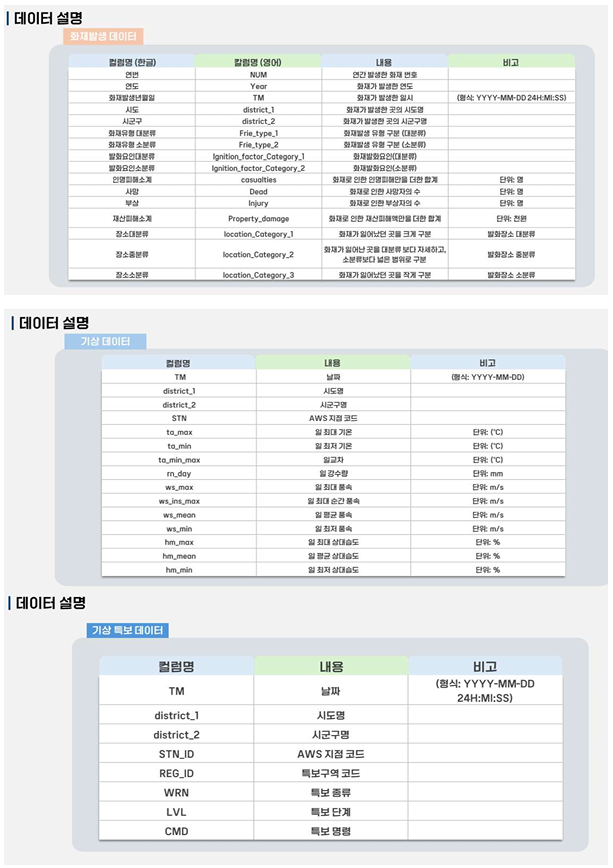

In [4]:
fire_weather_special = pd.read_csv(PATH+'[2024년 날씨 빅데이터 콘테스트]/[활용데이터]/datasets/과제 3 - 기상에 따른 화재 발생에 관한 상관분석/fire_weather_special2.csv')
fire_weather = pd.read_csv(PATH+'[2024년 날씨 빅데이터 콘테스트]/[활용데이터]/datasets/과제 3 - 기상에 따른 화재 발생에 관한 상관분석/fire_weather.csv')
fire_firefighting = pd.read_csv(PATH+'[2024년 날씨 빅데이터 콘테스트]/[활용데이터]/datasets/과제 3 - 기상에 따른 화재 발생에 관한 상관분석/fire_firefighting.csv')

In [5]:
fire_weather_special = fire_weather_special.drop(columns=['Unnamed: 0'])
fire_weather = fire_weather.drop(columns=['Unnamed: 0'])
fire_firefighting = fire_firefighting.drop(columns=['Unnamed: 0'])

In [6]:
aws_weather_hour = pd.read_csv(PATH+"[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/방재기상관측(AWS)/OBS_AWS_TIM_2018-2023.csv")

In [8]:
asos_weather_hour = pd.read_csv(PATH+"[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/종관기상관측(ASOS)/OBS_ASOS_TIM_2018-2023.csv")

<ipython-input-8-bfc565761879>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  asos_weather_hour = pd.read_csv(PATH+"[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/종관기상관측(ASOS)/OBS_ASOS_TIM_2018-2023.csv")


In [9]:
aws_weather_hour.head()

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm),현지기압(hPa),해면기압(hPa),습도(%)
0,12,안면도(감),2018-01-01 00:00,1.4,1.7,3.8,0.0,1019.1,1026.7,51.0
1,12,안면도(감),2018-01-01 01:00,0.4,41.9,2.9,0.0,1019.2,1026.8,58.0
2,12,안면도(감),2018-01-01 02:00,0.4,48.8,2.7,0.0,1019.3,1026.9,56.0
3,12,안면도(감),2018-01-01 03:00,0.4,81.3,2.7,0.0,1019.5,1027.1,65.0
4,12,안면도(감),2018-01-01 04:00,0.5,87.0,2.5,0.0,1019.5,1027.1,60.0


In [10]:
asos_weather_hour.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),district_1,district_2
0,90,속초,2018-01-01 00:00,-1.0,0.0,NaN,NaN,1.1,NaN,250.0,...,NaN,NaN,-2.3,0.0,NaN,NaN,NaN,NaN,강원특별자치도,고성군
1,90,속초,2018-01-01 01:00,-2.1,0.0,NaN,NaN,1.7,0.0,230.0,...,NaN,NaN,-2.7,0.0,NaN,NaN,NaN,NaN,강원특별자치도,고성군
2,90,속초,2018-01-01 02:00,-2.1,0.0,NaN,NaN,1.4,0.0,160.0,...,NaN,NaN,-3.0,0.0,NaN,NaN,NaN,NaN,강원특별자치도,고성군
3,90,속초,2018-01-01 03:00,-2.2,0.0,NaN,NaN,0.9,0.0,230.0,...,NaN,NaN,-3.2,0.0,NaN,NaN,NaN,NaN,강원특별자치도,고성군
4,90,속초,2018-01-01 04:00,-2.0,0.0,NaN,NaN,1.2,0.0,250.0,...,NaN,NaN,-3.3,0.0,NaN,NaN,NaN,NaN,강원특별자치도,고성군


### [전처리] 지역 중앙 좌표 및 지점 매핑

In [11]:
import requests
import json
import pandas as pd
import numpy as np
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)  # 0.12.1.post1

0.14.0


In [12]:
# 지역별 지점코드 데이터
df_weather_stn = fire_weather[['fire_weather.district_1', 'fire_weather.district_2', 'fire_weather.stn']].drop_duplicates()

df_fire_fighting = pd.merge(fire_firefighting, df_weather_stn, how='left',
                            left_on=['fire_firefighting.district_1', 'fire_firefighting.district_2'], right_on=['fire_weather.district_1', 'fire_weather.district_2'])

df_fire_fighting = df_fire_fighting.drop(columns=['fire_weather.district_1', 'fire_weather.district_2'])

In [13]:
# aws의 지점이 더 많다? 개수는 맞은데, fire_fighting이 적은 듯
len(df_weather_stn['fire_weather.stn'].unique()), len(aws_weather_hour['지점'].unique())

(188, 545)

In [14]:
# 70개의 지점이 불일치
len(set(df_weather_stn['fire_weather.stn'].unique()) - (set(df_weather_stn['fire_weather.stn'].unique()) & set(aws_weather_hour['지점'].unique())))

70

#### 행정동 코드 매핑

In [15]:
# 행정동 코드 매핑을 위환 변환 ## 혜정님 코드
# Define the function as described
def change_district_2(df, col, change_dict):
    for change_to, change_list in change_dict.items():
        for each_change in change_list:
            df.loc[df[col] == each_change, col] = change_to

    # Check
    for change_to, change_list in change_dict.items():
        for each_change in change_list:
            print(f"Indices for {each_change} changed to {change_to}:")
            print(df[df[col] == each_change].index)

    return df

# Define the mappings
change_dict = {
    '고양시': ['고양시덕양구', '고양시일산동구', '고양시일산서구'],
    '성남시': ['성남시분당구', '성남시수정구', '성남시중원구'],
    '수원시': ['수원시권선구', '수원시영통구', '수원시장안구', '수원시팔달구'],
    '안산시': ['안산시단원구', '안산시상록구'],
    '안양시': ['안양시동안구', '안양시만안구'],
    '용인시': ['용인시기흥구', '용인시수지구', '용인시처인구',],
    '전주시': ['전주시덕진구','전주시완산구'],
    '창원시': ['창원시마산합포구','창원시마산회원구','창원시성산구','창원시의창구','창원시진해구'],
    '천안시': ['천안시동남구','천안시서북구'],
    '청주시': ['청주시상당구','청주시서원구','청주시청원구','청주시흥덕구','청주시상당구','청주시서원구','청주시청원구','청주시흥덕구'],
    '포항시': ['포항시남구','포항시북구']
}

# Apply the changes
df_weather_stn = change_district_2(df_weather_stn, 'fire_weather.district_2',change_dict)
df_weather_stn

Indices for 고양시덕양구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시일산동구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시일산서구 changed to 고양시:
Index([], dtype='int64')
Indices for 성남시분당구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시수정구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시중원구 changed to 성남시:
Index([], dtype='int64')
Indices for 수원시권선구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시영통구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시장안구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시팔달구 changed to 수원시:
Index([], dtype='int64')
Indices for 안산시단원구 changed to 안산시:
Index([], dtype='int64')
Indices for 안산시상록구 changed to 안산시:
Index([], dtype='int64')
Indices for 안양시동안구 changed to 안양시:
Index([], dtype='int64')
Indices for 안양시만안구 changed to 안양시:
Index([], dtype='int64')
Indices for 용인시기흥구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시수지구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시처인구 changed to 용인시:
Ind

,fire_weather.district_1,fire_weather.district_2,fire_weather.stn
0,서울특별시,종로구,108
2191,서울특별시,중구,108
4382,서울특별시,용산구,421
6535,서울특별시,성동구,408
8724,서울특별시,광진구,413
...,...,...,...
541624,강원특별자치도,화천군,555
543815,강원특별자치도,양구군,556
546006,강원특별자치도,인제군,211
548197,강원특별자치도,고성군,517


In [16]:
# 세종 수정
df_weather_stn.loc[df_weather_stn['fire_weather.district_1'] == '세종특별자치시', 'fire_weather.district_2'] = '세종특별자치시'
df_weather_stn[df_weather_stn['fire_weather.district_1'] == '세종특별자치시']

,fire_weather.district_1,fire_weather.district_2,fire_weather.stn
166910,세종특별자치시,세종특별자치시,496


In [17]:
## 화재 데이터도 맞춰줘야 됨!! (주소 값 일부 소실)
# Apply the changes
df_fire_fighting = change_district_2(df_fire_fighting, 'fire_firefighting.district_2',change_dict)
df_fire_fighting.loc[df_fire_fighting['fire_firefighting.district_1'] == '세종특별자치시', 'fire_firefighting.district_2'] = '세종특별자치시'

Indices for 고양시덕양구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시일산동구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시일산서구 changed to 고양시:
Index([], dtype='int64')
Indices for 성남시분당구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시수정구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시중원구 changed to 성남시:
Index([], dtype='int64')
Indices for 수원시권선구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시영통구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시장안구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시팔달구 changed to 수원시:
Index([], dtype='int64')
Indices for 안산시단원구 changed to 안산시:
Index([], dtype='int64')
Indices for 안산시상록구 changed to 안산시:
Index([], dtype='int64')
Indices for 안양시동안구 changed to 안양시:
Index([], dtype='int64')
Indices for 안양시만안구 changed to 안양시:
Index([], dtype='int64')
Indices for 용인시기흥구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시수지구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시처인구 changed to 용인시:
Ind

In [18]:
change_dict = {
    '고양시': ['고양시덕양구', '고양시일산동구', '고양시일산서구'],
    '성남시': ['성남시분당구', '성남시수정구', '성남시중원구'],
    '수원시': ['수원시권선구', '수원시영통구', '수원시장안구', '수원시팔달구'],
    '안산시': ['안산시단원구', '안산시상록구'],
    '안양시': ['안양시동안구', '안양시만안구'],
    '용인시': ['용인시기흥구', '용인시수지구', '용인시처인구',],
    '전주시': ['전주시덕진구','전주시완산구'],
    '창원시': ['창원시마산합포구','창원시마산회원구','창원시성산구','창원시의창구','창원시진해구'],
    '천안시': ['천안시동남구','천안시서북구'],
    '청주시': ['청주시상당구','청주시서원구','청주시청원구','청주시흥덕구','청주시상당구','청주시서원구','청주시청원구','청주시흥덕구'],
    '포항시': ['포항시남구','포항시북구']
}

In [19]:
## 화재 데이터도 맞춰줘야 됨!! (주소 값 일부 소실)
# Apply the changes
fire_weather = change_district_2(fire_weather, 'fire_weather.district_2',change_dict)
fire_weather.loc[fire_weather['fire_weather.district_1'] == '세종특별자치시', 'fire_weather.district_2'] = '세종특별자치시'

Indices for 고양시덕양구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시일산동구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시일산서구 changed to 고양시:
Index([], dtype='int64')
Indices for 성남시분당구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시수정구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시중원구 changed to 성남시:
Index([], dtype='int64')
Indices for 수원시권선구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시영통구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시장안구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시팔달구 changed to 수원시:
Index([], dtype='int64')
Indices for 안산시단원구 changed to 안산시:
Index([], dtype='int64')
Indices for 안산시상록구 changed to 안산시:
Index([], dtype='int64')
Indices for 안양시동안구 changed to 안양시:
Index([], dtype='int64')
Indices for 안양시만안구 changed to 안양시:
Index([], dtype='int64')
Indices for 용인시기흥구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시수지구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시처인구 changed to 용인시:
Ind

In [20]:
district_df = pd.read_excel(PATH+'[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/행정구역별코드/KIKcd_H.20240118.xlsx')

print("Original district_dfFrame:")
print(district_df.head())

# Function to process 행정동코드
def process_code(code):
    code_str = str(code)
    if code_str.endswith('00000000'):
        return code_str[:2]
    else:
        return code_str[:5]

# Apply the function to create a new column '행정동코드_Processed'
district_df['행정동코드_Processed'] = district_df['행정동코드'].apply(process_code)

# Rename the columns
district_df = district_df.rename(columns={'시도명': 'district_1', '시군구명': 'district_2'})

# Create a new district_dfFrame with the desired columns
new_district_df = district_df[['행정동코드_Processed', 'district_1', 'district_2']]
new_district_df = new_district_df.drop_duplicates()
# Display the new district_dfFrame
print("New district_dfFrame:")
print(new_district_df.head())

new_district_df['행정동코드_Processed'] =new_district_df['행정동코드_Processed'].map(lambda x : str(x).zfill(5))

# Save the new district_dfFrame to a CSV file (optional)
new_district_df.to_csv('new_district_df.csv', index=False)

Original district_dfFrame:
        행정동코드    시도명 시군구명   읍면동명      생성일자  말소일자
0  1100000000  서울특별시  NaN    NaN  19880423   NaN
1  1111000000  서울특별시  종로구    NaN  19880423   NaN
2  1111051500  서울특별시  종로구  청운효자동  20081101   NaN
3  1111053000  서울특별시  종로구    사직동  19880423   NaN
4  1111054000  서울특별시  종로구    삼청동  19880423   NaN
New district_dfFrame:
   행정동코드_Processed district_1 district_2
0               11      서울특별시        NaN
1            11110      서울특별시        종로구
19           11140      서울특별시         중구
35           11170      서울특별시        용산구
52           11200      서울특별시        성동구


In [21]:
# 둘다 매핑될 수 있어서 행정동 코드만으로 변환!
new_district_df.loc[new_district_df['행정동코드_Processed'] == '36110', 'district_2'] = '세종특별자치시'
new_district_df[new_district_df['district_1'] == '세종특별자치시']

,행정동코드_Processed,district_1,district_2
1261,00036,세종특별자치시,NaN
1262,36110,세종특별자치시,세종특별자치시


In [22]:
# firefighting과 일치하도록 행정동 코드쪽도 매핑 수정
change_dict = {
    '고양시': ['고양시 덕양구', '고양시 일산동구', '고양시 일산서구'],
    '성남시': ['성남시 분당구', '성남시 수정구', '성남시 중원구'],
    '수원시': ['수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구'],
    '안산시': ['안산시 단원구', '안산시 상록구'],
    '안양시': ['안양시 동안구', '안양시 만안구'],
    '용인시': ['용인시 기흥구', '용인시 수지구', '용인시 처인구',],
    '전주시': ['전주시 덕진구','전주시 완산구'],
    '창원시': ['창원시 마산합포구','창원시 마산회원구','창원시 성산구','창원시 의창구','창원시 진해구'],
    '천안시': ['천안시 동남구','천안시 서북구'],
    '청주시': ['청주시 상당구','청주시 서원구','청주시 청원구','청주시 흥덕구','청주시상당구','청주시 서원구','청주시 청원구','청주시 흥덕구'],
    '포항시': ['포항시 남구','포항시 북구'],
    '부천시': ['부천시 소사구','부천시 오정구','부천시 원미구']
}

# Apply the changes
new_district_data = change_district_2(new_district_df, 'district_2',change_dict)
new_district_data

Indices for 고양시 덕양구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시 일산동구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시 일산서구 changed to 고양시:
Index([], dtype='int64')
Indices for 성남시 분당구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시 수정구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시 중원구 changed to 성남시:
Index([], dtype='int64')
Indices for 수원시 권선구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시 영통구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시 장안구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시 팔달구 changed to 수원시:
Index([], dtype='int64')
Indices for 안산시 단원구 changed to 안산시:
Index([], dtype='int64')
Indices for 안산시 상록구 changed to 안산시:
Index([], dtype='int64')
Indices for 안양시 동안구 changed to 안양시:
Index([], dtype='int64')
Indices for 안양시 만안구 changed to 안양시:
Index([], dtype='int64')
Indices for 용인시 기흥구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시 수지구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시 처인구 ch

,행정동코드_Processed,district_1,district_2
0,00011,서울특별시,NaN
1,11110,서울특별시,종로구
19,11140,서울특별시,중구
35,11170,서울특별시,용산구
52,11200,서울특별시,성동구
...,...,...,...
3852,52740,전북특별자치도,장수군
3860,52750,전북특별자치도,임실군
3873,52770,전북특별자치도,순창군
3885,52790,전북특별자치도,고창군


In [23]:
# 문제 발생!! 변경한 값중 stn 값이 일치하지 않는 경우 발생
## 일단 좌표 기반으로 aws 다시 매핑하기로 함
count_by_value = (df_weather_stn['fire_weather.district_1'] + df_weather_stn['fire_weather.district_2']).value_counts()
count_by_value[count_by_value > 1].index.tolist()

['경상남도창원시',
 '충청북도청주시',
 '경기도수원시',
 '경기도고양시',
 '경기도용인시',
 '경기도성남시',
 '경상북도포항시',
 '경기도안산시',
 '경기도안양시',
 '충청남도천안시',
 '전북특별자치도전주시']

In [24]:
df_weather_stn[df_weather_stn['fire_weather.district_1'] == '경상남도']

,fire_weather.district_1,fire_weather.district_2,fire_weather.stn
460032,경상남도,창원시,255
462225,경상남도,창원시,255
464418,경상남도,창원시,899
465887,경상남도,창원시,899
467356,경상남도,창원시,908
469547,경상남도,진주시,192
471737,경상남도,통영시,162
473930,경상남도,사천시,917
476119,경상남도,김해시,253
479028,경상남도,밀양시,288


In [25]:
# 중복 컬럼제거
print(df_weather_stn.shape)

df_weather_stn['fire_weather.district_sum'] = df_weather_stn['fire_weather.district_1'] + df_weather_stn['fire_weather.district_2']
df_weather_stn = df_weather_stn.drop_duplicates(subset=['fire_weather.district_sum'], keep='first')
df_weather_stn = df_weather_stn.drop(columns=['fire_weather.district_sum'])

print(df_weather_stn.shape)

(250, 3)
(229, 3)


In [26]:
# 중복 컬럼제거 -> 행정동 값인데 어떻게 해야할지 모르겠음(고민 필요)
print(new_district_data.shape)

new_district_data['fire_weather.district_sum'] = new_district_data['district_1'] + new_district_data['district_2']
new_district_data = new_district_data.drop_duplicates(subset=['fire_weather.district_sum'], keep='last') # 첫번째로 하면 위경도에서 못찾아서 last로 수정
new_district_data = new_district_data.drop(columns=['fire_weather.district_sum'])

print(new_district_data.shape)

(294, 3)
(241, 3)


In [27]:
# 행정동 코드 매핑 완료
df_weather_stn = pd.merge(df_weather_stn, new_district_data, how='left',
                                left_on=['fire_weather.district_1', 'fire_weather.district_2'], right_on=['district_1', 'district_2']).drop(['district_1', 'district_2'], axis=1)
df_weather_stn.head()

,fire_weather.district_1,fire_weather.district_2,fire_weather.stn,행정동코드_Processed
0,서울특별시,종로구,108,11110
1,서울특별시,중구,108,11140
2,서울특별시,용산구,421,11170
3,서울특별시,성동구,408,11200
4,서울특별시,광진구,413,11215


In [28]:
df_weather_stn.isna().sum()

fire_weather.district_1    0
fire_weather.district_2    0
fire_weather.stn           0
행정동코드_Processed            0
dtype: int64

#### 위경도 매핑

In [29]:
# 위경도 데이터 ## 용현님 참고
df_geo = pd.read_csv(PATH+'[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/위도 경도 데이터/sgg.csv')
df_geo.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,center_point,latitude,longitude
0,11110,Jongno-gu,종로구,POLYGON ((127.00864326221884 37.58046825204710...,POINT (126.97732129487213 37.59491731931452),37.594917,126.977321
1,11140,Jung-gu,중구,POLYGON ((127.02313682632543 37.57196080977186...,POINT (126.99596813970754 37.56014356455128),37.560144,126.995968
2,11170,Yongsan-gu,용산구,POLYGON ((126.96918343789535 37.55566257096262...,POINT (126.9799069882358 37.531384965881514),37.531385,126.979907
3,11200,Seongdong-gu,성동구,POLYGON ((127.04341316154634 37.57233714944435...,POINT (127.04105853332118 37.55102968913442),37.551030,127.041059
4,11215,Gwangjin-gu,광진구,POLYGON ((127.10166464162197 37.57240065825002...,POINT (127.08574409768117 37.546720237931474),37.546720,127.085744


In [30]:
# 세종은 동일해서 수정 불필요
df_geo[df_geo['SIG_KOR_NM'] == '세종특별자치시']

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,center_point,latitude,longitude
75,36110,Sejong-si,세종특별자치시,POLYGON ((127.17841156617698 36.59687459632547...,POINT (127.25878005171005 36.5606577077708),36.560658,127.25878


In [31]:
# 행정동 코드쪽도 매핑 수정
change_dict = {
    '고양시': ['고양시 덕양구', '고양시 일산동구', '고양시 일산서구'],
    '성남시': ['성남시 분당구', '성남시 수정구', '성남시 중원구'],
    '수원시': ['수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구'],
    '안산시': ['안산시 단원구', '안산시 상록구'],
    '안양시': ['안양시 동안구', '안양시 만안구'],
    '용인시': ['용인시 기흥구', '용인시 수지구', '용인시 처인구',],
    '전주시': ['전주시 덕진구','전주시 완산구'],
    '창원시': ['창원시 마산합포구','창원시 마산회원구','창원시 성산구','창원시 의창구','창원시 진해구'],
    '천안시': ['천안시 동남구','천안시 서북구'],
    '청주시': ['청주시 상당구','청주시 서원구','청주시 청원구','청주시 흥덕구','청주시상당구','청주시 서원구','청주시 청원구','청주시 흥덕구'],
    '포항시': ['포항시 남구','포항시 북구'],
    '부천시': ['부천시 소사구','부천시 오정구','부천시 원미구'],
}

# Apply the changes
df_geo = change_district_2(df_geo, 'SIG_KOR_NM',change_dict)
df_geo

Indices for 고양시 덕양구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시 일산동구 changed to 고양시:
Index([], dtype='int64')
Indices for 고양시 일산서구 changed to 고양시:
Index([], dtype='int64')
Indices for 성남시 분당구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시 수정구 changed to 성남시:
Index([], dtype='int64')
Indices for 성남시 중원구 changed to 성남시:
Index([], dtype='int64')
Indices for 수원시 권선구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시 영통구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시 장안구 changed to 수원시:
Index([], dtype='int64')
Indices for 수원시 팔달구 changed to 수원시:
Index([], dtype='int64')
Indices for 안산시 단원구 changed to 안산시:
Index([], dtype='int64')
Indices for 안산시 상록구 changed to 안산시:
Index([], dtype='int64')
Indices for 안양시 동안구 changed to 안양시:
Index([], dtype='int64')
Indices for 안양시 만안구 changed to 안양시:
Index([], dtype='int64')
Indices for 용인시 기흥구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시 수지구 changed to 용인시:
Index([], dtype='int64')
Indices for 용인시 처인구 ch

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,center_point,latitude,longitude
0,11110,Jongno-gu,종로구,POLYGON ((127.00864326221884 37.58046825204710...,POINT (126.97732129487213 37.59491731931452),37.594917,126.977321
1,11140,Jung-gu,중구,POLYGON ((127.02313682632543 37.57196080977186...,POINT (126.99596813970754 37.56014356455128),37.560144,126.995968
2,11170,Yongsan-gu,용산구,POLYGON ((126.96918343789535 37.55566257096262...,POINT (126.9799069882358 37.531384965881514),37.531385,126.979907
3,11200,Seongdong-gu,성동구,POLYGON ((127.04341316154634 37.57233714944435...,POINT (127.04105853332118 37.55102968913442),37.551030,127.041059
4,11215,Gwangjin-gu,광진구,POLYGON ((127.10166464162197 37.57240065825002...,POINT (127.08574409768117 37.546720237931474),37.546720,127.085744
...,...,...,...,...,...,...,...
247,52740,Jangsu-gun,장수군,POLYGON ((127.61996048396304 35.83894326361689...,POINT (127.54426407333824 35.657460976652644),35.657461,127.544264
248,52750,Imsil-gun,임실군,POLYGON ((127.10477063380588 35.61909819248706...,POINT (127.23666221372446 35.59824238567515),35.598242,127.236662
249,52770,Sunchang-gun,순창군,POLYGON ((126.97726353278284 35.55563878559118...,POINT (127.0900869739092 35.433634301889796),35.433634,127.090087
250,52790,Gochang-gun,고창군,MULTIPOLYGON (((126.42759750504419 35.44846835...,POINT (126.61604618382057 35.448167571267604),35.448168,126.616046


In [32]:
df_weather_stn['행정동코드_Processed'] = df_weather_stn['행정동코드_Processed'].astype('int64')

In [33]:
# 위경도 매핑 (geo 데이터는 용량이 커서 제외)
df_weather_stn = pd.merge(df_weather_stn, df_geo, how='left',
                                left_on=['행정동코드_Processed'], right_on=['SIG_CD']).drop(['행정동코드_Processed','SIG_ENG_NM', 'SIG_KOR_NM', 'geometry', 'center_point'], axis=1)

df_weather_stn.head()

,fire_weather.district_1,fire_weather.district_2,fire_weather.stn,SIG_CD,latitude,longitude
0,서울특별시,종로구,108,11110,37.594917,126.977321
1,서울특별시,중구,108,11140,37.560144,126.995968
2,서울특별시,용산구,421,11170,37.531385,126.979907
3,서울특별시,성동구,408,11200,37.551030,127.041059
4,서울특별시,광진구,413,11215,37.546720,127.085744


#### 위경도에 따른 AWS 지점 매핑

In [34]:
df_aws_stn = pd.read_csv(PATH+'[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/[활용데이터]/방재기상관측(AWS)/방재기상관측.csv', encoding='euc-kr')
df_aws_stn.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,지점,시작일,종료일,지점명,지점주소,관리관서,위도,경도,노장해발고도(m)
0,12,07-11-30,NaN,안면도(감),충청남도 태안군 안면읍,NaN,36.5333,126.3167,60.00
1,96,20-10-23,NaN,독도,경상북도 울릉군울릉읍 독도이사부길63,울릉도기상대(115),37.2395,131.8698,99.08
2,96,09-10-27,20-10-23,독도,경상북도 울릉군울릉읍 독도이사부길63,울릉도기상대(115),37.2395,131.8698,96.15
3,116,23-10-21,NaN,관악(레),경기도 과천시중앙로 관악산길(관악산기상레이더관측소),NaN,37.4453,126.9640,624.82
4,116,10-08-06,23-10-21,관악(레),경기도 과천시중앙로 관악산길(관악산기상레이더관측소),NaN,37.4453,126.9640,624.82


In [35]:
# aws_weather_hour['지점'] 에는 있지만, df_aws_stn['지점']에 없는 지점 -> 문의 해봐야 할듯
set(aws_weather_hour['지점'].unique()) - (set(df_aws_stn[df_aws_stn['종료일'].isna()==True]['지점']) & set(aws_weather_hour['지점'].unique()))

{296,
 347,
 348,
 349,
 378,
 422,
 521,
 528,
 562,
 608,
 685,
 866,
 873,
 879,
 880,
 887,
 891,
 968,
 969,
 972,
 977,
 994}

In [36]:
# 그 외 지점은 안겹침
len(set(df_aws_stn[df_aws_stn['종료일'].isna()==True]['지점']) & set(aws_weather_hour['지점'].unique()))

523

In [37]:
df_aws_stn = df_aws_stn[df_aws_stn['종료일'].isna()==True]

In [38]:
import pandas as pd
from geopy.distance import geodesic
from pyproj import Transformer

# 결과를 저장할 리스트
aws_stn_mapping_results = []

# 각 df_weather_stn 데이터에 대해 가장 가까운 AWS 지점 찾기
for _, map_row in df_weather_stn.iterrows():
    map_x, map_y = map_row['latitude'], map_row['longitude']
    try:
        # 좌표 변환
        map_lat, map_lon = map_x, map_y
        map_coords = (map_lat, map_lon)

        # 위도와 경도가 유효한 범위인지 확인
        # if not (-90 <= map_lat <= 90 and -180 <= map_lon <= 180):
        #     raise ValueError("변환된 좌표가 유효한 범위를 벗어났습니다.")

        min_distance = float('inf')
        closest_asos_station = None

        for _, asos_row in df_aws_stn.iterrows():
            asos_coords = (asos_row['위도'], asos_row['경도'])
            distance = geodesic(map_coords, asos_coords).kilometers

            if distance < min_distance:
                min_distance = distance
                closest_asos_station = asos_row['지점']

        aws_stn_mapping_results.append({
            'fire_weather.district_1': map_row['fire_weather.district_1'],
            'fire_weather.district_2': map_row['fire_weather.district_2'],
            'SIG_CD': map_row['SIG_CD'],
            'X': map_row['latitude'],
            'Y': map_row['longitude'],
            '위도': map_lat,
            '경도': map_lon,
            'AWS지점': closest_asos_station,
            '거리(km)': min_distance
        })
    except Exception as e:
        print(f"Error transforming coordinates for row {map_row}: {e}")

# 매핑 결과를 데이터프레임으로 변환
df_weather_stn_result = pd.DataFrame(aws_stn_mapping_results)


df_weather_stn_result.head()

,fire_weather.district_1,fire_weather.district_2,SIG_CD,X,Y,위도,경도,AWS지점,거리(km)
0,서울특별시,종로구,11110,37.594917,126.977321,37.594917,126.977321,414,2.691885
1,서울특별시,중구,11140,37.560144,126.995968,37.560144,126.995968,419,1.145339
2,서울특별시,용산구,11170,37.531385,126.979907,37.531385,126.979907,415,1.264784
3,서울특별시,성동구,11200,37.551030,127.041059,37.551030,127.041059,421,0.465887
4,서울특별시,광진구,11215,37.546720,127.085744,37.546720,127.085744,413,1.467459


In [39]:
df_weather_stn_result.to_csv(PATH+"data/지역_중심좌표_AWS위경도.csv", index=False)

#### 위경도에 따른 asos 지점 매핑

In [ ]:
df_asos_stn = pd.read_csv(PATH+"data/META_ASOS_관측지점정보_20240521223117.csv", encoding="euc-kr")

df_asos_stn = df_asos_stn[~df_asos_stn["지점"].isna()]

In [ ]:
df_asos_stn.head()

In [ ]:
aws_weather_hour.head()

In [ ]:
# asos_weather_hour['지점'] 에는 있지만, df_asos_stn['지점']에 없는 지점 -> 없다!
set(asos_weather_hour['지점'].unique()) - (set(df_asos_stn['지점']) & set(asos_weather_hour['지점'].unique()))

In [ ]:
len(set(df_asos_stn['지점'])), len(asos_weather_hour['지점'].unique())

In [ ]:
# 그 외 지점은 안겹침
len(set(df_asos_stn['지점']) & set(asos_weather_hour['지점'].unique()))

In [ ]:
import pandas as pd
from geopy.distance import geodesic
from pyproj import Transformer

# 결과를 저장할 리스트
aws_stn_mapping_results = []

# 각 df_weather_stn 데이터에 대해 가장 가까운 AWS 지점 찾기
for _, map_row in df_weather_stn.iterrows():
    map_x, map_y = map_row['latitude'], map_row['longitude']
    try:
        # 좌표 변환
        map_lat, map_lon = map_x, map_y
        map_coords = (map_lat, map_lon)

        # 위도와 경도가 유효한 범위인지 확인
        # if not (-90 <= map_lat <= 90 and -180 <= map_lon <= 180):
        #     raise ValueError("변환된 좌표가 유효한 범위를 벗어났습니다.")

        min_distance = float('inf')
        closest_asos_station = None

        for _, asos_row in df_asos_stn.iterrows():
            asos_coords = (asos_row['위도'], asos_row['경도'])
            distance = geodesic(map_coords, asos_coords).kilometers

            if distance < min_distance:
                min_distance = distance
                closest_asos_station = asos_row['지점']

        aws_stn_mapping_results.append({
            'fire_weather.district_1': map_row['fire_weather.district_1'],
            'fire_weather.district_2': map_row['fire_weather.district_2'],
            'SIG_CD': map_row['SIG_CD'],
            'X': map_row['latitude'],
            'Y': map_row['longitude'],
            '위도': map_lat,
            '경도': map_lon,
            'ASOS지점': closest_asos_station,
            '거리(km)': min_distance
        })
    except Exception as e:
        print(f"Error transforming coordinates for row {map_row}: {e}")

# 매핑 결과를 데이터프레임으로 변환
df_weather_stn_asos_result = pd.DataFrame(aws_stn_mapping_results)


df_weather_stn_asos_result.head()

#### AWS와 ASOS 지점 조인

In [ ]:
df_weather_stn_asos_result['district_full'] = df_weather_stn_asos_result['fire_weather.district_1'] + ' ' + df_weather_stn_asos_result['fire_weather.district_2']

In [ ]:
df_weather_stn_result['district_full'] = df_weather_stn_result['fire_weather.district_1'] + ' ' + df_weather_stn_result['fire_weather.district_2']

In [ ]:
len(df_weather_stn_asos_result['district_full']), len(df_weather_stn_result['district_full'])

(229, 229)

In [ ]:
df_all_weather_stn_result = pd.merge(df_weather_stn_result, df_weather_stn_asos_result[['ASOS지점', 'district_full']], how='left',
                        left_on=['district_full'], right_on=['district_full'])

In [ ]:
df_all_weather_stn_result

,fire_weather.district_1,fire_weather.district_2,SIG_CD,X,Y,위도,경도,AWS지점,거리(km),district_full,ASOS지점
0,서울특별시,종로구,11110,37.594917,126.977321,37.594917,126.977321,414,2.691885,서울특별시 종로구,108
1,서울특별시,중구,11140,37.560144,126.995968,37.560144,126.995968,419,1.145339,서울특별시 중구,108
2,서울특별시,용산구,11170,37.531385,126.979907,37.531385,126.979907,415,1.264784,서울특별시 용산구,108
3,서울특별시,성동구,11200,37.551030,127.041059,37.551030,127.041059,421,0.465887,서울특별시 성동구,108
4,서울특별시,광진구,11215,37.546720,127.085744,37.546720,127.085744,413,1.467459,서울특별시 광진구,108
...,...,...,...,...,...,...,...,...,...,...,...
224,강원특별자치도,화천군,51790,38.138426,127.685166,38.138426,127.685166,555,6.106383,강원특별자치도 화천군,93
225,강원특별자치도,양구군,51800,38.175609,128.000206,38.175609,128.000206,587,6.976107,강원특별자치도 양구군,211
226,강원특별자치도,인제군,51810,38.064600,128.264727,38.064600,128.264727,321,8.182793,강원특별자치도 인제군,211
227,강원특별자치도,고성군,51820,38.362754,128.411156,38.362754,128.411156,517,6.121587,강원특별자치도 고성군,90


#### [전처리]날씨데이터 조인 (시간/일)

In [ ]:
from datetime import datetime, timedelta

# 시간만 고려 -> 시간단위 데이터만 제공됨
# 시간으로 반올림 ## 영준님 코드 참고
df_fire_fighting['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting['fire_firefighting.tm']).dt.round('H')
# fire_firefighting['adjust_tm_hour'] = pd.to_datetime(fire_firefighting['fire_firefighting.tm']).dt.strftime('%Y-%m-%d %H:00')

In [ ]:
df_fire_fighting['fire_firefighting.district_full'] = df_fire_fighting['fire_firefighting.district_1'] + ' ' + df_fire_fighting['fire_firefighting.district_2']

In [ ]:
fire_weather['fire_weather.district_full']  = fire_weather['fire_weather.district_1'] + ' ' + fire_weather['fire_weather.district_2']

In [ ]:
region_list = df_fire_fighting['fire_firefighting.district_full'].unique()

In [ ]:
df_fire_fighting['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting['adjust_tm_hour'])

In [ ]:
aws_weather_hour['일시'] = pd.to_datetime(aws_weather_hour['일시'])

In [ ]:
asos_weather_hour['일시'] = pd.to_datetime(asos_weather_hour['일시'])

### 지역별 화재 + AWS + ASOS 조인

In [ ]:
region_list

array(['경기도 고양시', '전북특별자치도 완주군', '경기도 남양주시', '충청남도 보령시', '전라남도 순천시',
       '서울특별시 강북구', '경상남도 밀양시', '경기도 안성시', '경상남도 창원시', '경상남도 김해시',
       '전라남도 장흥군', '서울특별시 관악구', '울산광역시 울주군', '부산광역시 사하구', '강원특별자치도 정선군',
       '부산광역시 남구', '충청북도 영동군', '대구광역시 동구', '충청남도 예산군', '제주특별자치도 제주시',
       '경기도 수원시', '경상남도 거제시', '대구광역시 북구', '경기도 김포시', '강원특별자치도 강릉시',
       '경기도 의왕시', '경상남도 합천군', '서울특별시 금천구', '강원특별자치도 원주시', '경기도 평택시',
       '부산광역시 부산진구', '대전광역시 대덕구', '경상남도 의령군', '경기도 광명시', '강원특별자치도 인제군',
       '경상북도 포항시', '대전광역시 동구', '서울특별시 영등포구', '전북특별자치도 전주시', '서울특별시 성동구',
       '전라남도 해남군', '서울특별시 송파구', '서울특별시 중구', '광주광역시 서구', '충청북도 청주시',
       '경기도 양주시', '경기도 성남시', '대전광역시 서구', '경기도 화성시', '경상북도 경주시',
       '충청남도 당진시', '경상북도 상주시', '강원특별자치도 철원군', '충청북도 괴산군', '충청남도 서산시',
       '서울특별시 강동구', '대구광역시 서구', '경상북도 구미시', '경기도 파주시', '서울특별시 동작구',
       '충청북도 단양군', '경기도 안양시', '경기도 구리시', '부산광역시 북구', '강원특별자치도 양양군',
       '인천광역시 서구', '인천광역시 강화군', '서울특별시 강남구', '전북특별자치도 군산시', '서울특별시 중랑구',
       '인천광역시 연수구', '서울특별시 광

In [ ]:
for region in region_list:
    print("========================"+region+"========================")
    df_fire_fighting_test = df_fire_fighting[df_fire_fighting['fire_firefighting.district_full'] == region]
    aws_stn = df_all_weather_stn_result[df_all_weather_stn_result['district_full'] == region]['AWS지점'].iloc[0]
    asos_stn = df_all_weather_stn_result[df_all_weather_stn_result['district_full'] == region]['ASOS지점'].iloc[0]

    aws_weather_hour_test = aws_weather_hour[aws_weather_hour['지점'] == aws_stn]
    asos_weather_hour_test = asos_weather_hour[asos_weather_hour['지점'] == asos_stn]

    df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])

    df_fire_fighting_test = pd.merge(aws_weather_hour_test, df_fire_fighting_test, how='left',
                            left_on=['일시'], right_on=['adjust_tm_hour'])

    df_fire_fighting_test2 = pd.merge(df_fire_fighting_test, asos_weather_hour_test, how='left',
                            left_on=['일시'], right_on=['일시'])

    print(df_fire_fighting[df_fire_fighting['fire_firefighting.district_full'] == region].shape, aws_weather_hour_test.shape, asos_weather_hour_test.shape, df_fire_fighting_test.shape, df_fire_fighting_test2.shape)

    df_fire_fighting_test2.to_csv(PATH+'[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/지역별_화재_AWS_ASOS_데이터/task3_'+region+'.csv', index=False)

========================경기도 고양시========================
(2858, 19) (54533, 10) (52574, 40) (54639, 29) (54639, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 완주군========================
(2858, 19) (54713, 10) (52584, 40) (54719, 29) (54719, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 남양주시========================
(2858, 19) (54564, 10) (52584, 40) (54637, 29) (54637, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 보령시========================
(2858, 19) (54723, 10) (52584, 40) (54734, 29) (54734, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 순천시========================
(2858, 19) (54688, 10) (52582, 40) (54716, 29) (54716, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 강북구========================
(2858, 19) (54712, 10) (52584, 40) (54725, 29) (54725, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 밀양시========================
(2858, 19) (48142, 10) (52584, 40) (48153, 29) (48153, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 안성시========================
(2858, 19) (54704, 10) (52584, 40) (54762, 29) (54762, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 창원시========================
(2858, 19) (48063, 10) (52565, 40) (48191, 29) (48191, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 김해시========================
(2858, 19) (48143, 10) (52584, 40) (48222, 29) (48222, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 장흥군========================
(2858, 19) (54718, 10) (52583, 40) (54725, 29) (54725, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 관악구========================
(2858, 19) (54726, 10) (0, 40) (54756, 29) (54756, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================울산광역시 울주군========================
(2858, 19) (54697, 10) (52584, 40) (54751, 29) (54751, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 사하구========================
(2858, 19) (47789, 10) (52584, 40) (47808, 29) (47808, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 정선군========================
(2858, 19) (54736, 10) (52584, 40) (54740, 29) (54740, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 남구========================
(2858, 19) (48026, 10) (52584, 40) (48029, 29) (48029, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 영동군========================
(2858, 19) (54292, 10) (52584, 40) (54295, 29) (54295, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 동구========================
(2858, 19) (48048, 10) (52584, 40) (48061, 29) (48061, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 예산군========================
(2858, 19) (54598, 10) (52584, 40) (54612, 29) (54612, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================제주특별자치도 제주시========================
(2858, 19) (54694, 10) (52584, 40) (54753, 29) (54753, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 수원시========================
(2858, 19) (54023, 10) (52584, 40) (54092, 29) (54092, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 거제시========================
(2858, 19) (40847, 10) (52584, 40) (40862, 29) (40862, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 북구========================
(2858, 19) (47959, 10) (0, 40) (47982, 29) (47982, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 김포시========================
(2858, 19) (38164, 10) (52584, 40) (38213, 29) (38213, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 강릉시========================
(2858, 19) (46193, 10) (52584, 40) (46215, 29) (46215, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 의왕시========================
(2858, 19) (51920, 10) (0, 40) (51930, 29) (51930, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 합천군========================
(2858, 19) (48001, 10) (52583, 40) (48006, 29) (48006, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 금천구========================
(2858, 19) (54554, 10) (0, 40) (54568, 29) (54568, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 원주시========================
(2858, 19) (54713, 10) (52584, 40) (54750, 29) (54750, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 평택시========================
(2858, 19) (54384, 10) (52584, 40) (54492, 29) (54492, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 부산진구========================
(2858, 19) (48060, 10) (52584, 40) (48085, 29) (48085, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대전광역시 대덕구========================
(2858, 19) (48086, 10) (52584, 40) (48105, 29) (48105, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 의령군========================
(2858, 19) (48116, 10) (52580, 40) (48122, 29) (48122, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 광명시========================
(2858, 19) (23871, 10) (0, 40) (23875, 29) (23875, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 인제군========================
(2858, 19) (54705, 10) (52581, 40) (54707, 29) (54707, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 포항시========================
(2858, 19) (47982, 10) (52584, 40) (48033, 29) (48033, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대전광역시 동구========================
(2858, 19) (48120, 10) (52584, 40) (48131, 29) (48131, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 영등포구========================
(2858, 19) (54691, 10) (52584, 40) (54723, 29) (54723, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 전주시========================
(2858, 19) (54731, 10) (52584, 40) (54788, 29) (54788, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 성동구========================
(2858, 19) (53783, 10) (52584, 40) (53803, 29) (53803, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 해남군========================
(2858, 19) (54705, 10) (52584, 40) (54717, 29) (54717, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 송파구========================
(2858, 19) (54682, 10) (0, 40) (54730, 29) (54730, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 중구========================
(2858, 19) (54609, 10) (52584, 40) (54622, 29) (54622, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================광주광역시 서구========================
(2858, 19) (54543, 10) (52584, 40) (54553, 29) (54553, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 청주시========================
(2858, 19) (54689, 10) (52584, 40) (54791, 29) (54791, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 양주시========================
(2858, 19) (53234, 10) (52584, 40) (53276, 29) (53276, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 성남시========================
(2858, 19) (52388, 10) (0, 40) (52486, 29) (52486, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대전광역시 서구========================
(2858, 19) (47850, 10) (52584, 40) (47881, 29) (47881, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 화성시========================
(2858, 19) (47775, 10) (52584, 40) (47928, 29) (47928, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 경주시========================
(2858, 19) (54684, 10) (52584, 40) (54712, 29) (54712, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 당진시========================
(2858, 19) (54508, 10) (52561, 40) (54522, 29) (54522, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 상주시========================
(2858, 19) (48090, 10) (52584, 40) (48108, 29) (48108, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 철원군========================
(2858, 19) (54693, 10) (52584, 40) (54704, 29) (54704, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 괴산군========================
(2858, 19) (54719, 10) (52580, 40) (54721, 29) (54721, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 서산시========================
(2858, 19) (54741, 10) (52561, 40) (54754, 29) (54754, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 강동구========================
(2858, 19) (53853, 10) (52584, 40) (53863, 29) (53863, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 서구========================
(2858, 19) (48094, 10) (0, 40) (48101, 29) (48101, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 구미시========================
(2858, 19) (48093, 10) (52584, 40) (48127, 29) (48127, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 파주시========================
(2858, 19) (54507, 10) (52574, 40) (54579, 29) (54579, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 동작구========================
(2858, 19) (54631, 10) (0, 40) (54641, 29) (54641, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 단양군========================
(2858, 19) (54681, 10) (52584, 40) (54681, 29) (54681, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 안양시========================
(2858, 19) (53320, 10) (0, 40) (53340, 29) (53340, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 구리시========================
(2858, 19) (54200, 10) (52584, 40) (54204, 29) (54204, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 북구========================
(2858, 19) (48110, 10) (8519, 40) (48117, 29) (48117, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 양양군========================
(2858, 19) (54433, 10) (52584, 40) (54438, 29) (54438, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 서구========================
(2858, 19) (54572, 10) (52584, 40) (54605, 29) (54605, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 강화군========================
(2858, 19) (54504, 10) (52584, 40) (54511, 29) (54511, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 강남구========================
(2858, 19) (54419, 10) (0, 40) (54495, 29) (54495, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 군산시========================
(2858, 19) (54692, 10) (52584, 40) (54714, 29) (54714, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 중랑구========================
(2858, 19) (54526, 10) (52584, 40) (54536, 29) (54536, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 연수구========================
(2858, 19) (54735, 10) (52584, 40) (54741, 29) (54741, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 광진구========================
(2858, 19) (54628, 10) (52584, 40) (54645, 29) (54645, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 부여군========================
(2858, 19) (54703, 10) (52584, 40) (54706, 29) (54706, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 영주시========================
(2858, 19) (48112, 10) (52584, 40) (48119, 29) (48119, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 기장군========================
(2858, 19) (48026, 10) (52584, 40) (48038, 29) (48038, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 도봉구========================
(2858, 19) (54637, 10) (52584, 40) (54641, 29) (54641, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 중구========================
(2858, 19) (48095, 10) (52584, 40) (48098, 29) (48098, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 강진군========================
(2858, 19) (54554, 10) (52579, 40) (54560, 29) (54560, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 경산시========================
(2858, 19) (48136, 10) (52584, 40) (48151, 29) (48151, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 수영구========================
(2858, 19) (54393, 10) (52584, 40) (54398, 29) (54398, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 진주시========================
(2858, 19) (48105, 10) (52579, 40) (48129, 29) (48129, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 정읍시========================
(2858, 19) (54742, 10) (52583, 40) (54768, 29) (54768, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 목포시========================
(2858, 19) (54675, 10) (52584, 40) (54683, 29) (54683, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================울산광역시 중구========================
(2858, 19) (37405, 10) (52584, 40) (37407, 29) (37407, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 동대문구========================
(2858, 19) (54626, 10) (52584, 40) (54635, 29) (54635, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 천안시========================
(2858, 19) (54543, 10) (52584, 40) (54610, 29) (54610, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 아산시========================
(2858, 19) (44226, 10) (52584, 40) (44246, 29) (44246, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 충주시========================
(2858, 19) (54698, 10) (52580, 40) (54716, 29) (54716, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 고령군========================
(2858, 19) (47830, 10) (52583, 40) (47836, 29) (47836, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대전광역시 중구========================
(2858, 19) (47850, 10) (52584, 40) (47863, 29) (47863, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 남해군========================
(2858, 19) (48107, 10) (52584, 40) (48110, 29) (48110, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 동해시========================
(2858, 19) (29451, 10) (52584, 40) (29452, 29) (29452, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 함안군========================
(2858, 19) (48141, 10) (52580, 40) (48150, 29) (48150, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 용인시========================
(2858, 19) (54023, 10) (52584, 40) (54122, 29) (54122, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 서천군========================
(2858, 19) (54703, 10) (52584, 40) (54704, 29) (54704, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================제주특별자치도 서귀포시========================
(2858, 19) (32061, 10) (52582, 40) (32088, 29) (32088, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 공주시========================
(2858, 19) (54610, 10) (40213, 40) (54621, 29) (54621, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 문경시========================
(2858, 19) (47797, 10) (52584, 40) (47799, 29) (47799, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 고성군========================
(2858, 19) (54720, 10) (52584, 40) (54726, 29) (54726, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 남원시========================
(2858, 19) (54604, 10) (52584, 40) (54612, 29) (54612, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 달서구========================
(2858, 19) (48094, 10) (52584, 40) (48109, 29) (48109, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 의정부시========================
(2858, 19) (54690, 10) (52584, 40) (54721, 29) (54721, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 포천시========================
(2858, 19) (54466, 10) (52584, 40) (54510, 29) (54510, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 성주군========================
(2858, 19) (48047, 10) (52584, 40) (48054, 29) (48054, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 남동구========================
(2858, 19) (53913, 10) (52584, 40) (53935, 29) (53935, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 사천시========================
(2858, 19) (48067, 10) (52579, 40) (48082, 29) (48082, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 순창군========================
(2858, 19) (54449, 10) (52584, 40) (54453, 29) (54453, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 구로구========================
(2858, 19) (54376, 10) (0, 40) (54390, 29) (54390, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 은평구========================
(2858, 19) (54224, 10) (52584, 40) (54242, 29) (54242, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 동두천시========================
(2858, 19) (48108, 10) (52584, 40) (48112, 29) (48112, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================광주광역시 광산구========================
(2858, 19) (48047, 10) (52584, 40) (48078, 29) (48078, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 칠곡군========================
(2858, 19) (48033, 10) (52584, 40) (48042, 29) (48042, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 양산시========================
(2858, 19) (48095, 10) (52584, 40) (48110, 29) (48110, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 종로구========================
(2858, 19) (54705, 10) (52584, 40) (54720, 29) (54720, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================울산광역시 동구========================
(2858, 19) (37405, 10) (52584, 40) (37407, 29) (37407, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 중구========================
(2858, 19) (54711, 10) (52584, 40) (54723, 29) (54723, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 금산군========================
(2858, 19) (54710, 10) (52584, 40) (54715, 29) (54715, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 논산시========================
(2858, 19) (54601, 10) (52584, 40) (54617, 29) (54617, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대전광역시 유성구========================
(2858, 19) (48086, 10) (52584, 40) (48101, 29) (48101, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 강서구========================
(2858, 19) (54518, 10) (52584, 40) (54553, 29) (54553, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 양천구========================
(2858, 19) (54716, 10) (52584, 40) (54735, 29) (54735, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 김천시========================
(2858, 19) (47896, 10) (52584, 40) (47914, 29) (47914, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 시흥시========================
(2858, 19) (54723, 10) (0, 40) (54774, 29) (54774, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 태안군========================
(2858, 19) (54741, 10) (52561, 40) (54744, 29) (54744, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 옹진군========================
(2858, 19) (54687, 10) (52584, 40) (54688, 29) (54688, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 서초구========================
(2858, 19) (54720, 10) (0, 40) (54736, 29) (54736, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 마포구========================
(2858, 19) (53985, 10) (52584, 40) (54009, 29) (54009, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 부천시========================
(2858, 19) (54476, 10) (52584, 40) (54517, 29) (54517, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 동구========================
(2858, 19) (48060, 10) (52584, 40) (48060, 29) (48060, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 예천군========================
(2858, 19) (48103, 10) (52584, 40) (48104, 29) (48104, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 광주시========================
(2858, 19) (52564, 10) (52584, 40) (52604, 29) (52604, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 김제시========================
(2858, 19) (54456, 10) (52584, 40) (54486, 29) (54486, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 곡성군========================
(2858, 19) (54372, 10) (0, 40) (54374, 29) (54374, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 청도군========================
(2858, 19) (48056, 10) (52584, 40) (48057, 29) (48057, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 성북구========================
(2858, 19) (54705, 10) (52584, 40) (54728, 29) (54728, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 과천시========================
(2858, 19) (54663, 10) (0, 40) (54664, 29) (54664, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 구례군========================
(2858, 19) (54492, 10) (52584, 40) (54493, 29) (54493, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 부안군========================
(2858, 19) (54602, 10) (52584, 40) (54615, 29) (54615, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 강서구========================
(2858, 19) (47776, 10) (52584, 40) (47813, 29) (47813, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 안산시========================
(2858, 19) (54705, 10) (52584, 40) (54773, 29) (54773, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 여주시========================
(2858, 19) (54187, 10) (52584, 40) (54229, 29) (54229, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 여수시========================
(2858, 19) (54707, 10) (52584, 40) (54732, 29) (54732, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 광양시========================
(2858, 19) (54732, 10) (52517, 40) (54741, 29) (54741, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 사상구========================
(2858, 19) (47776, 10) (8519, 40) (47781, 29) (47781, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 달성군========================
(2858, 19) (14127, 10) (52584, 40) (14134, 29) (14134, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 나주시========================
(2858, 19) (54696, 10) (52584, 40) (54722, 29) (54722, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 함평군========================
(2858, 19) (54512, 10) (52579, 40) (54522, 29) (54522, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================세종특별자치시 세종특별자치시========================
(2858, 19) (54554, 10) (40213, 40) (54575, 29) (54575, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 부평구========================
(2858, 19) (53913, 10) (52584, 40) (53925, 29) (53925, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================광주광역시 북구========================
(2858, 19) (48120, 10) (52584, 40) (48134, 29) (48134, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 무주군========================
(2858, 19) (54733, 10) (52584, 40) (54734, 29) (54734, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 장성군========================
(2858, 19) (54625, 10) (52581, 40) (54633, 29) (54633, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 영덕군========================
(2858, 19) (48066, 10) (52583, 40) (48066, 29) (48066, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 창녕군========================
(2858, 19) (48114, 10) (52584, 40) (48126, 29) (48126, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 완도군========================
(2858, 19) (54725, 10) (52582, 40) (54725, 29) (54725, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 영암군========================
(2858, 19) (54480, 10) (52584, 40) (54493, 29) (54493, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 미추홀구========================
(2858, 19) (54735, 10) (52584, 40) (54748, 29) (54748, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================울산광역시 남구========================
(2858, 19) (37405, 10) (52584, 40) (37425, 29) (37425, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================광주광역시 동구========================
(2858, 19) (48120, 10) (52584, 40) (48122, 29) (48122, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 제천시========================
(2858, 19) (54704, 10) (52584, 40) (54705, 29) (54705, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================광주광역시 남구========================
(2858, 19) (39969, 10) (52584, 40) (39972, 29) (39972, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 춘천시========================
(2858, 19) (54712, 10) (52584, 40) (54755, 29) (54755, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 오산시========================
(2858, 19) (54061, 10) (52584, 40) (54067, 29) (54067, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 노원구========================
(2858, 19) (54541, 10) (52584, 40) (54554, 29) (54554, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 남구========================
(2858, 19) (48094, 10) (52584, 40) (48097, 29) (48097, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 하남시========================
(2858, 19) (49215, 10) (52584, 40) (49222, 29) (49222, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 진천군========================
(2858, 19) (54444, 10) (52584, 40) (54450, 29) (54450, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 통영시========================
(2858, 19) (48136, 10) (52584, 40) (48143, 29) (48143, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 거창군========================
(2858, 19) (48054, 10) (52584, 40) (48060, 29) (48060, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 이천시========================
(2858, 19) (54695, 10) (52584, 40) (54717, 29) (54717, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 홍천군========================
(2858, 19) (54706, 10) (52584, 40) (54722, 29) (54722, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 울진군========================
(2858, 19) (48130, 10) (52584, 40) (48134, 29) (48134, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 장수군========================
(2858, 19) (20726, 10) (52584, 40) (20726, 29) (20726, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 화순군========================
(2858, 19) (54699, 10) (0, 40) (54704, 29) (54704, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 보은군========================
(2858, 19) (54721, 10) (52584, 40) (54723, 29) (54723, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 의성군========================
(2858, 19) (47892, 10) (52583, 40) (47901, 29) (47901, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 삼척시========================
(2858, 19) (54723, 10) (0, 40) (54726, 29) (54726, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 동래구========================
(2858, 19) (48053, 10) (8519, 40) (48060, 29) (48060, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 산청군========================
(2858, 19) (48059, 10) (52584, 40) (48062, 29) (48062, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================울산광역시 북구========================
(2858, 19) (54425, 10) (52584, 40) (54437, 29) (54437, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 옥천군========================
(2858, 19) (54627, 10) (52584, 40) (54632, 29) (54632, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 용산구========================
(2858, 19) (54566, 10) (52584, 40) (54578, 29) (54578, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 하동군========================
(2858, 19) (48106, 10) (52517, 40) (48120, 29) (48120, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 익산시========================
(2858, 19) (54252, 10) (52584, 40) (54293, 29) (54293, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 군포시========================
(2858, 19) (54465, 10) (52584, 40) (54467, 29) (54467, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 음성군========================
(2858, 19) (54720, 10) (52580, 40) (54739, 29) (54739, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 고창군========================
(2858, 19) (54557, 10) (52581, 40) (54567, 29) (54567, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 양평군========================
(2858, 19) (54584, 10) (52584, 40) (54605, 29) (54605, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 계양구========================
(2858, 19) (50551, 10) (52584, 40) (50556, 29) (50556, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 수성구========================
(2858, 19) (48048, 10) (52584, 40) (48054, 29) (48054, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 영광군========================
(2858, 19) (54610, 10) (52579, 40) (54613, 29) (54613, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 영천시========================
(2858, 19) (48142, 10) (52584, 40) (48154, 29) (48154, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================서울특별시 서대문구========================
(2858, 19) (54698, 10) (52584, 40) (54720, 29) (54720, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 연천군========================
(2858, 19) (54439, 10) (52584, 40) (54443, 29) (54443, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 무안군========================
(2858, 19) (54527, 10) (52584, 40) (54533, 29) (54533, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 속초시========================
(2858, 19) (54698, 10) (52584, 40) (54704, 29) (54704, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 금정구========================
(2858, 19) (48127, 10) (52584, 40) (48132, 29) (48132, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 안동시========================
(2858, 19) (48127, 10) (52584, 40) (48133, 29) (48133, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 해운대구========================
(2858, 19) (54393, 10) (52584, 40) (54413, 29) (54413, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 고성군========================
(2858, 19) (48023, 10) (52584, 40) (48031, 29) (48031, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청북도 증평군========================
(2858, 19) (54711, 10) (52584, 40) (54711, 29) (54711, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 청송군========================
(2858, 19) (48112, 10) (52584, 40) (48112, 29) (48112, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 임실군========================
(2858, 19) (54694, 10) (52584, 40) (54696, 29) (54696, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 화천군========================
(2858, 19) (54730, 10) (52584, 40) (54730, 29) (54730, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 보성군========================
(2858, 19) (54345, 10) (52584, 40) (54351, 29) (54351, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 고흥군========================
(2858, 19) (54741, 10) (52584, 40) (54756, 29) (54756, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 신안군========================
(2858, 19) (54705, 10) (52584, 40) (54712, 29) (54712, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 계룡시========================
(2858, 19) (54085, 10) (52584, 40) (54085, 29) (54085, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 횡성군========================
(2858, 19) (54720, 10) (52584, 40) (54728, 29) (54728, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 봉화군========================
(2858, 19) (48066, 10) (52584, 40) (48066, 29) (48066, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상남도 함양군========================
(2858, 19) (48127, 10) (52584, 40) (48134, 29) (48134, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 연제구========================
(2858, 19) (48053, 10) (52584, 40) (48061, 29) (48061, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 태백시========================
(2858, 19) (54723, 10) (52584, 40) (54723, 29) (54723, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 영월군========================
(2858, 19) (54703, 10) (52584, 40) (54705, 29) (54705, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================인천광역시 동구========================
(2858, 19) (54711, 10) (52584, 40) (54713, 29) (54713, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 중구========================
(2858, 19) (48048, 10) (0, 40) (48048, 29) (48048, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 진도군========================
(2858, 19) (54618, 10) (52584, 40) (54620, 29) (54620, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 홍성군========================
(2858, 19) (54717, 10) (52584, 40) (54722, 29) (54722, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 평창군========================
(2858, 19) (54724, 10) (52584, 40) (54726, 29) (54726, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================대구광역시 군위군========================
(2858, 19) (48115, 10) (52583, 40) (48116, 29) (48116, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================강원특별자치도 양구군========================
(2858, 19) (54721, 10) (52581, 40) (54722, 29) (54722, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 영도구========================
(2858, 19) (47372, 10) (52584, 40) (47374, 29) (47374, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================부산광역시 서구========================
(2858, 19) (48095, 10) (52584, 40) (48099, 29) (48099, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전라남도 담양군========================
(2858, 19) (54309, 10) (52584, 40) (54321, 29) (54321, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경기도 가평군========================
(2858, 19) (54287, 10) (52584, 40) (54300, 29) (54300, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 울릉군========================
(2858, 19) (48080, 10) (52584, 40) (48080, 29) (48080, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================충청남도 청양군========================
(2858, 19) (54707, 10) (52584, 40) (54708, 29) (54708, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================전북특별자치도 진안군========================
(2858, 19) (54464, 10) (52584, 40) (54465, 29) (54465, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


========================경상북도 영양군========================
(2858, 19) (48135, 10) (52583, 40) (48135, 29) (48135, 68)


<ipython-input-86-347dd80e71c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_fighting_test['adjust_tm_hour'] = pd.to_datetime(df_fire_fighting_test['adjust_tm_hour'])


### 지역별 화재 + AWS + ASOS 파일 로드 및 병합

In [ ]:
import pandas as pd
import glob
import os

# 경로 설정 (region 변수는 각 지역명으로 바뀌어야 합니다)
base_path = PATH + '[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/지역별_화재_AWS_ASOS_데이터/'

# 모든 CSV 파일 경로를 가져오기
all_files = os.listdir(base_path)
csv_files = [os.path.join(base_path, file) for file in all_files if file.startswith('task3_') and file.endswith('.csv')]

# 각 파일을 읽어와서 데이터프레임으로 변환한 후 리스트에 저장
df_list = [pd.read_csv(file) for file in csv_files]

# 모든 데이터프레임을 하나로 병합 (행 단위로)
df_all = pd.concat(df_list, ignore_index=True)

# 결과 확인
print(df_all.head())

<ipython-input-103-32ba9e484814>:13: DtypeWarning: Columns (30,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
<ipython-input-103-32ba9e484814>:13: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
<ipython-input-103-32ba9e484814>:13: DtypeWarning: Columns (30,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
<ipython-input-103-32ba9e484814>:13: DtypeWarning: Columns (30,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
<ipython-input-103-32ba9e484814>:13: DtypeWarning: Columns (30,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
<ipython-input-1

   지점_x 지점명_x                   일시  기온(°C)_x  풍향(deg)  풍속(m/s)_x  강수량(mm)_x  \
0   589  고양고봉  2018-01-01 00:00:00      -5.6      0.0        0.0        0.0   
1   589  고양고봉  2018-01-01 01:00:00      -5.9      0.0        0.0        0.0   
2   589  고양고봉  2018-01-01 02:00:00      -6.2      0.0        0.0        0.0   
3   589  고양고봉  2018-01-01 03:00:00      -6.5      0.0        0.0        0.0   
4   589  고양고봉  2018-01-01 04:00:00      -7.2      0.0        0.0        0.0   

   현지기압(hPa)_x  해면기압(hPa)_x  습도(%)_x  ...  지면상태(지면상태코드)  현상번호(국내식) 지면온도(°C)  \
0          NaN          NaN      NaN  ...           NaN        NaN     -3.9   
1          NaN          NaN      NaN  ...           NaN        NaN     -4.2   
2          NaN          NaN      NaN  ...           NaN        NaN     -4.4   
3          NaN          NaN      NaN  ...           NaN        NaN     -4.6   
4          NaN          NaN      NaN  ...           NaN        NaN     -4.8   

  지면온도 QC플래그 5cm 지중온도(°C) 10cm 지중온도(°C) 20cm 지중온도(

In [ ]:
df_all.shape

(11756613, 68)

In [ ]:
df_all.head()

,지점_x,지점명_x,일시,기온(°C)_x,풍향(deg),풍속(m/s)_x,강수량(mm)_x,현지기압(hPa)_x,해면기압(hPa)_x,습도(%)_x,...,지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),district_1,district_2
0,589,고양고봉,2018-01-01 00:00:00,-5.6,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-3.9,0.0,NaN,NaN,NaN,NaN,경기도,파주시
1,589,고양고봉,2018-01-01 01:00:00,-5.9,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.2,0.0,NaN,NaN,NaN,NaN,경기도,파주시
2,589,고양고봉,2018-01-01 02:00:00,-6.2,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.4,0.0,NaN,NaN,NaN,NaN,경기도,파주시
3,589,고양고봉,2018-01-01 03:00:00,-6.5,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.6,0.0,NaN,NaN,NaN,NaN,경기도,파주시
4,589,고양고봉,2018-01-01 04:00:00,-7.2,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.8,0.0,NaN,NaN,NaN,NaN,경기도,파주시


In [ ]:
df_all.columns = ['지점_AWS', '지점명_AWS', '일시', '기온(°C)_AWS', '풍향(deg)_AWS', '풍속(m/s)_AWS', '강수량(mm)_AWS',
       '현지기압(hPa)_AWS', '해면기압(hPa)_AWS', '습도(%)_AWS', 'fire_firefighting.num',
       'fire_firefighting.year', 'fire_firefighting.tm',
       'fire_firefighting.district_1', 'fire_firefighting.district_2',
       'fire_firefighting.fire_type_1', 'fire_firefighting.fire_type_2',
       'fire_firefighting.ignition_factor_category_1',
       'fire_firefighting.ignition_factor_category_2',
       'fire_firefighting.casualties', 'fire_firefighting.dead',
       'fire_firefighting.injury', 'fire_firefighting.property_damage',
       'fire_firefighting.location_category_1',
       'fire_firefighting.location_category_2',
       'fire_firefighting.location_category_3', 'fire_weather.stn',
       'adjust_tm_hour', 'fire_firefighting.district_full', '지점_ASOS', '지점명_ASOS',
       '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)',
       '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그',
       '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
       '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'district_1',
       'district_2']

In [ ]:
# Parquet 형식으로 데이터 저장
df_all.to_parquet(PATH+'[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/task3_all_region_data.parquet', compression='gzip')

In [ ]:
# 저장된 데이터 불러오기
df_all_loaded = pd.read_parquet(PATH+'[2024년 날씨 빅데이터 콘테스트]/[과제3] 기상현상과 화재발생에 대한 상관분석/task3_all_region_data.parquet')

In [ ]:
df_all_loaded.shape

(11756613, 68)

In [ ]:
df_all_loaded.isna().sum()

지점_AWS                 0
지점명_AWS                0
일시                     0
기온(°C)_AWS         19935
풍향(deg)_AWS        73594
                  ...   
10cm 지중온도(°C)    7309555
20cm 지중온도(°C)    7308294
30cm 지중온도(°C)    7307663
district_1       1138752
district_2       1138752
Length: 68, dtype: int64

In [ ]:
df_all_loaded.columns

Index(['지점_AWS', '지점명_AWS', '일시', '기온(°C)_AWS', '풍향(deg)_AWS', '풍속(m/s)_AWS',
       '강수량(mm)_AWS', '현지기압(hPa)_AWS', '해면기압(hPa)_AWS', '습도(%)_AWS',
       'fire_firefighting.num', 'fire_firefighting.year',
       'fire_firefighting.tm', 'fire_firefighting.district_1',
       'fire_firefighting.district_2', 'fire_firefighting.fire_type_1',
       'fire_firefighting.fire_type_2',
       'fire_firefighting.ignition_factor_category_1',
       'fire_firefighting.ignition_factor_category_2',
       'fire_firefighting.casualties', 'fire_firefighting.dead',
       'fire_firefighting.injury', 'fire_firefighting.property_damage',
       'fire_firefighting.location_category_1',
       'fire_firefighting.location_category_2',
       'fire_firefighting.location_category_3', 'fire_weather.stn',
       'adjust_tm_hour', 'fire_firefighting.district_full', '지점_ASOS',
       '지점명_ASOS', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)',
       '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그'

In [ ]:
df_all_loaded.head()

,지점_AWS,지점명_AWS,일시,기온(°C)_AWS,풍향(deg)_AWS,풍속(m/s)_AWS,강수량(mm)_AWS,현지기압(hPa)_AWS,해면기압(hPa)_AWS,습도(%)_AWS,...,지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),district_1,district_2
0,589,고양고봉,2018-01-01 00:00:00,-5.6,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-3.9,0.0,NaN,NaN,NaN,NaN,경기도,파주시
1,589,고양고봉,2018-01-01 01:00:00,-5.9,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.2,0.0,NaN,NaN,NaN,NaN,경기도,파주시
2,589,고양고봉,2018-01-01 02:00:00,-6.2,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.4,0.0,NaN,NaN,NaN,NaN,경기도,파주시
3,589,고양고봉,2018-01-01 03:00:00,-6.5,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.6,0.0,NaN,NaN,NaN,NaN,경기도,파주시
4,589,고양고봉,2018-01-01 04:00:00,-7.2,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,-4.8,0.0,NaN,NaN,NaN,NaN,경기도,파주시
